In [1]:
#Libraries to be installed
!pip install pmdarima

     |████████████████████████████████| 1.5MB 31.4MB/s 
     |████████████████████████████████| 9.5MB 44.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pmd
from sklearn.metrics import confusion_matrix
plt.style.use('dark_background')

In [3]:
#Uploading Dataset
df = pd.read_excel('dataset.xlsx')
df.head()

,DATE,VALUES
0,1972-08-22,0.2673
1,1972-08-23,0.2703
2,1972-08-24,0.2706
3,1972-08-25,0.2722
4,1972-08-28,0.2704


In [4]:
#Data column is formatted and set as index
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index('DATE')

In [5]:
#Splitting train and test dataset
data = df.sort_index(ascending=True, axis=0)

train = data[:9744]
valid = data[9744:]

training = train['VALUES']
validation = valid['VALUES']

#Model fitting
model = pmd.auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3,start_P=0,seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

#Prediction using Auto-Arima
forecast = model.predict(n_periods=2474)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-59087.176, Time=1.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-58821.975, Time=1.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-59088.223, Time=0.77 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-59085.897, Time=3.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-58823.382, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-59087.197, Time=1.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-59085.195, Time=2.64 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-59089.797, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-59088.763, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-59088.744, Time=0.66 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-59087.342, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-59086.760, Time=0.81 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 14.576 seconds


In [6]:
#Calculating the rmse value
rmse=np.sqrt(np.mean(np.power((np.array(valid['VALUES'])-np.array(forecast['Prediction'])),2)))
rmse

0.43730188483992743

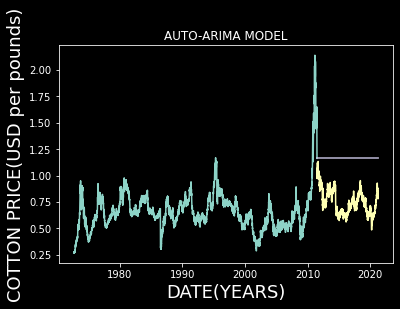

In [7]:
#Plotting the predicted values
plt.plot(train['VALUES'])
plt.plot(valid['VALUES'])
plt.title('AUTO-ARIMA MODEL')
plt.xlabel('DATE(YEARS)',fontsize=18)
plt.ylabel('COTTON PRICE(USD per pounds)',fontsize=18)

plt.plot(forecast['Prediction'])

In [8]:
#Reshaping the values
val_x = []

val_pred = []
val_x = valid['VALUES']
val_pred = forecast['Prediction']

val_x =val_x.to_numpy().reshape(-1,1)
val_pred=val_pred.to_numpy().reshape(-1,1)

In [9]:
cutoff = 0.9                             # decide on a cutoff limit
y_pred_classes = np.zeros_like(val_pred)    # initialise a matrix full with zeros
y_pred_classes[val_pred > cutoff] = 1  
y_test_classes = np.zeros_like(val_pred)
y_test_classes[val_x > cutoff] = 1
cm =confusion_matrix(y_test_classes, y_pred_classes)

In [10]:
#Calculating the model accuracy
rmse=np.sqrt(np.mean(np.power((np.array(valid['VALUES'])-np.array(forecast['Prediction'])),2)))
print("****AUTO ARIMA****")
print("RMSE value : ",rmse)
TP, FP, FN, TN = cm[0][0],cm[0][1],cm[1][0],cm[1][1]
ACC = (TP+TN)/(TP+TN+FP+FN)
print("ACCURACY : ",ACC)

****AUTO ARIMA****
RMSE value :  0.43730188483992743
ACCURACY :  0.09943411479385611
